In [4]:

import numpy as np
import pylab as plt
import pandas as pd

In [3]:
!ls datasets/

2014_world_gdp_with_codes.csv  migrants.csv
diabetes.csv		       monthly-milk-production-pounds.csv
disease.csv		       significant-earthquakes.csv
earthquake.csv		       su5m.csv
gapminderDataFiveYear.csv      tesla-stock-price.csv
maternal_health.csv


In [10]:
dftesla = pd.read_csv('datasets/tesla-stock-price.csv')
x = dftesla['date'].values
y = dftesla['close'].values
z = dftesla['open'].values

(array([  0., 200., 400., 600., 800.]),
 [Text(-100.0, 0, '2016/03/09'),
  Text(0.0, 0, '11:34'),
  Text(100.0, 0, '2018/05/24'),
  Text(200.0, 0, '2017/12/29'),
  Text(300.0, 0, '2017/08/08')])

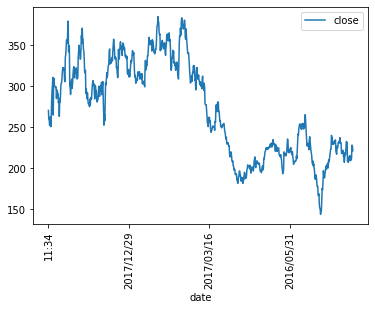

In [11]:
dftesla.plot('date','close')

plt.locator_params(axis='x', nbins=5)

plt.xticks(rotation=90)

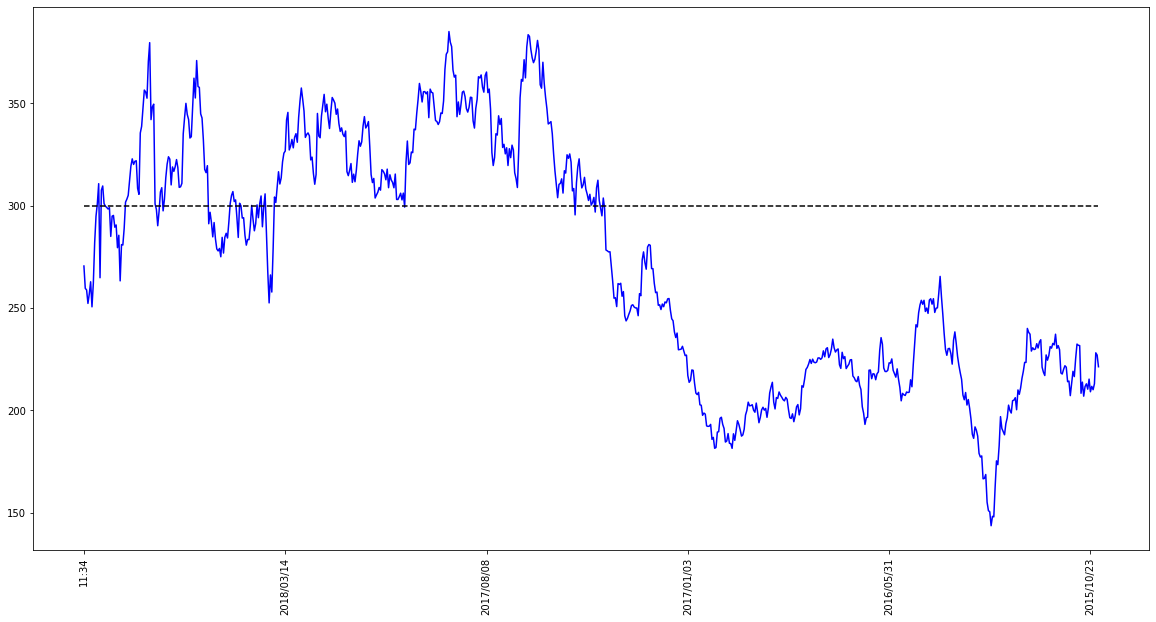

In [7]:
f, ax = plt.subplots(figsize=(20,10))
ax.plot(x,y,'b')
# ax.plot(x,z,'r')
ax.set_xticks(x[::150]);
plt.xticks(rotation=90)

ax.plot(np.arange(len(x)),np.zeros(len(x))+300,'k--')


In [10]:
df = pd.read_csv('datasets/monthly-milk-production-pounds.csv')
df

,Month,Monthly milk production (pounds per cow)
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


(0.0, 30.0)

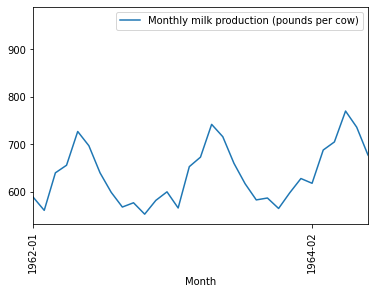

In [21]:
df.plot('Month','Monthly milk production (pounds per cow)'
        , kind='line')
ax.set_xticks(x[::150]);
plt.xticks(rotation=90)
plt.xlim(0,30)

In [30]:
dfeq = pd.read_csv('datasets/significant-earthquakes.csv')
dfeq

,Entity,Code,Year,Number of significant earthquakes (significant earthquakes)
0,Afghanistan,AFG,-2150,0
1,Afghanistan,AFG,-2000,0
2,Afghanistan,AFG,-1610,0
3,Afghanistan,AFG,-1566,0
4,Afghanistan,AFG,-1450,0
...,...,...,...,...
143635,Zambia,ZMB,2013,0
143636,Zambia,ZMB,2014,0
143637,Zambia,ZMB,2015,0
143638,Zambia,ZMB,2016,0


In [31]:
#rename index
dfeq = dfeq.rename(columns={'Number of significant earthquakes (significant earthquakes)':'sig'})
print(dfeq.columns)

Index(['Entity', 'Code', 'Year', 'sig'], dtype='object')


In [32]:
dfeq[(dfeq['Entity']=='Iran') & (dfeq['sig']==1)]

,Entity,Code,Year,sig
59551,Iran,IRN,-400,1
59689,Iran,IRN,634,1
59691,Iran,IRN,662,1
59705,Iran,IRN,743,1
59712,Iran,IRN,763,1
...,...,...,...,...
60447,Iran,IRN,1985,1
60449,Iran,IRN,1987,1
60462,Iran,IRN,2000,1
60471,Iran,IRN,2009,1


<AxesSubplot:xlabel='Year'>

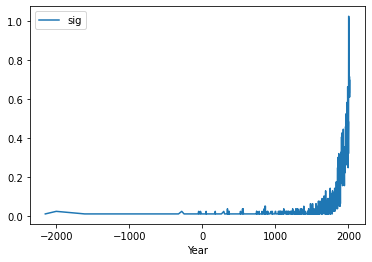

In [25]:
dfy = dfeq.groupby('Year')
dfy.mean().plot()


In [33]:
igb = dfeq[dfeq['Entity']=='Iran'].groupby('Year').mean()

<AxesSubplot:xlabel='Year'>

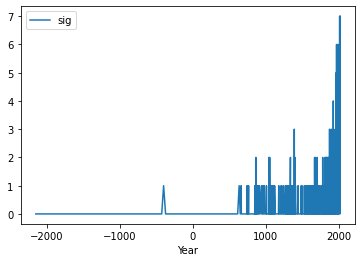

In [34]:
igb.plot()

In [8]:
df1 = pd.read_csv('datasets/2014_world_gdp_with_codes.csv')
print(df1.columns)
df1.describe()

Index(['COUNTRY', 'GDP (BILLIONS)', 'CODE'], dtype='object')


,GDP (BILLIONS)
count,222.000000
mean,352.637162
std,1464.855533
min,0.010000
25%,4.615000
50%,21.525000
75%,196.200000
max,17420.000000


In [79]:
# df1[df1['GDP (BILLIONS)']<1]

In [86]:
irangdp = df1[df1['COUNTRY']=='Iran']['GDP (BILLIONS)'].values[0]

In [92]:
# df1[df1['GDP (BILLIONS)']>irangdp]

In [96]:
df1.sort_values('GDP (BILLIONS)',ascending=0).head()

,COUNTRY,GDP (BILLIONS),CODE
211,United States,17420.0,USA
42,China,10360.0,CHN
101,Japan,4770.0,JPN
75,Germany,3820.0,DEU
70,France,2902.0,FRA


In [99]:
gdps = df1.sort_values('GDP (BILLIONS)',ascending=0)['GDP (BILLIONS)'].values

(0, 3000)

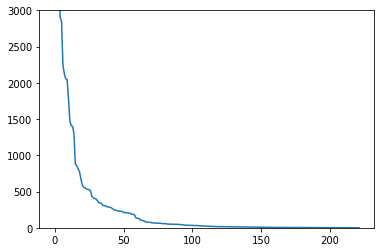

In [102]:
plt.plot(gdps)
plt.ylim(0,3000)

(array([112.,  23.,  17.,   5.,   3.,   3.,   0.,   3.,   6.,   7.]),
 array([1.00000e-02, 2.46490e+01, 4.92880e+01, 7.39270e+01, 9.85660e+01,
        1.23205e+02, 1.47844e+02, 1.72483e+02, 1.97122e+02, 2.21761e+02,
        2.46400e+02]),
 <a list of 10 Patch objects>)

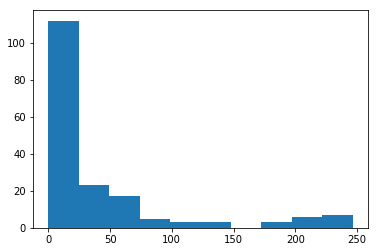

In [107]:
gdps = gdps[gdps<250]
plt.hist(gdps)

In [9]:
df2 = pd.read_csv('datasets/migrants.csv')
print(df2.columns)
df2.drop(columns=['Unnamed: 0','percentarea'])
df2.sort_values('number1000',ascending=0)

Index(['Unnamed: 0', 'ccode', 'country', 'number1000', 'percentarea',
       'under18'],
      dtype='object')


,Unnamed: 0,ccode,country,number1000,percentarea,under18
188,188,USA,United States of America,49777,15.0,5
152,152,SAU,Saudi Arabia,12185,37.0,20
66,66,DEU,Germany,12165,15.0,5
144,144,RUS,Russian Federation,11652,8.0,6
186,186,GBR,United Kingdom of Great Britain and Northern I...,8842,13.0,8
...,...,...,...,...,...,...
109,109,MHL,Marshall Islands,3,6.0,24
151,151,STP,Sao Tome and Principe,2,1.0,17
75,75,VAT,Holy See,1,100.0,-
128,128,NIU,Niue,1,34.0,42


In [ ]:
#merge 

In [5]:
df = pd.read_csv('datasets/maternal_health.csv')
df

,Unnamed: 0,ccode,country,year,Total,age 15-17,age 18-19,<20,>20,age 20-34,age 35-49
0,0,AFG,Afghanistan,2010.0,47.872012,48.292231,45.121149,45.634003,46.635823,46.702356,46.323971
1,1,ALB,Albania,2000.0,95.269887,100.000000,100.000000,100.000000,94.967483,95.399258,91.427947
2,2,ALB,Albania,2005.0,97.124568,100.000000,100.000000,100.000000,96.828206,97.107991,94.331780
3,3,ALB,Albania,2008.0,98.420840,92.577894,100.000000,97.778378,98.465574,98.467706,98.438906
4,4,ARG,Argentina,2012.0,98.070102,99.298196,98.597808,98.905995,97.936854,97.992949,97.707396
...,...,...,...,...,...,...,...,...,...,...,...
262,262,NaN,Includes surveys which microdata were availabl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,264,Source:,"UNICEF global databases 2016 based on DHS, MICS .",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = pd.read_csv('datasets/gapminderDataFiveYear.csv')
df
#group

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [71]:
df = pd.read_csv('../datasets/disease.csv')
df
#discribe, pie

,Unnamed: 0,ccode,country,year,AIDS,Congenital,Diarrhoea,Injury,Intrapartum,Malaria,Measles,Meningitis,Pneumonia,Preterm,Sepsis,Tetanus,Other,Total
0,0,AFG,Afghanistan,2017,0.0,6.4,7.8,5.8,15.9,0.1,1.8,3.4,14.9,19.2,8.4,1.6,14.7,100
1,1,ALB,Albania,2017,0.7,27.2,0.6,7.0,8.8,0.0,0.0,2.2,8.9,28.9,2.6,0.8,12.3,100
2,2,DZA,Algeria,2017,0.1,16.0,4.8,6.3,14.4,0.0,0.3,1.0,13.0,21.1,9.2,0.2,13.7,100
3,3,AND,Andorra,2017,0.0,16.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.7,0.0,0.0,16.7,100
4,4,AGO,Angola,2017,2.8,7.0,9.3,6.4,13.6,7.0,0.7,2.0,17.3,12.0,5.7,0.5,15.9,100
5,5,ATG,Antigua and Barbuda,2017,0.0,26.7,0.0,1.0,7.0,0.0,0.0,0.0,6.6,17.0,1.9,0.0,39.8,100
6,6,ARG,Argentina,2017,0.1,29.3,1.1,6.5,4.6,0.0,0.0,1.1,6.5,28.1,5.4,0.0,17.3,100
7,7,ARM,Armenia,2017,0.0,26.6,1.3,9.0,6.7,0.0,0.0,1.6,10.7,24.4,3.6,0.0,16.2,100
8,8,AUS,Australia,2017,0.0,27.1,0.6,6.8,11.1,0.0,0.0,0.7,3.0,21.5,1.3,0.0,27.9,100
9,9,AUT,Austria,2017,0.0,36.0,0.0,5.0,9.7,0.0,0.0,1.1,2.6,15.4,3.3,0.0,26.8,100


In [69]:
df = pd.read_csv('../datasets/su5m.csv')
df.mean()


Unnamed: 0    97.000000
m1990         76.001026
m2000         60.231282
m2010         41.063590
m2015         33.532308
m2017         31.383077
f1990         67.412821
f2000         53.001026
f2010         35.527692
f2015         28.628205
f2017         26.704615
dtype: float64